In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!wget -O logo.png "http://51.91.120.89/extras/python-logo.png"

--2022-01-08 12:52:35--  http://51.91.120.89/extras/python-logo.png
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116883 (114K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>] 114.14K   140KB/s    in 0.8s    

2022-01-08 12:52:37 (140 KB/s) - ‘logo.png’ saved [116883/116883]



In [3]:
# Pillow
im = Image.open("logo.png")
%timeit -r 10 -n 10 im.convert("L")

10 loops, best of 10: 2.06 ms per loop


In [4]:
# Numpy
img = mpimg.imread("logo.png")

R, G, B = img[ : , :, 0], img[ : , :, 1], img[ : , :, 2]
%timeit -r 10 -n 10 img_gray = R*0.2989 + G*0.587 + B*0.114

10 loops, best of 10: 5.99 ms per loop


In [5]:
#!pip install opencv-python
import cv2

In [6]:
img = cv2.imread("logo.png")
%timeit -r 10 -n 10 img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

10 loops, best of 10: 823 µs per loop


In [7]:
# Zmiana wielkości grafiki

In [8]:
# Pillow 
im = Image.open("logo.png")
%timeit -r 10 -n 100 im.resize( (800,237) )

100 loops, best of 10: 22.9 ms per loop


In [9]:
# Scikit-Image
# !pip install scikit-image
from skimage.transform import resize

In [10]:
im = plt.imread("logo.png")
%timeit -r 1 -n 10 resize(im, (800,237))

10 loops, best of 1: 136 ms per loop


In [11]:
# OpenCV
img = cv2.imread("logo.png")
%timeit -r 10 -n 100 cv2.resize(img, (800,237), interpolation=cv2.INTER_NEAREST )

100 loops, best of 10: 412 µs per loop


In [12]:
img_scale = cv2.resize(img, (800,237) )
cv2.imwrite("test.png", img_scale)

True

In [13]:
# Wstęp do CNN

In [14]:
!wget -O plik.jpg http://51.91.120.89/ML0901/cs.jpg

--2022-01-08 13:03:47--  http://51.91.120.89/ML0901/cs.jpg
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64508 (63K) [image/jpeg]
Saving to: ‘plik.jpg’

plik.jpg            100%[===================>]  63.00K   117KB/s    in 0.5s    

2022-01-08 13:03:48 (117 KB/s) - ‘plik.jpg’ saved [64508/64508]



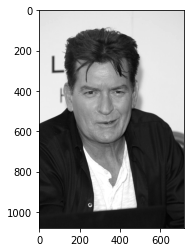

In [16]:
img = mpimg.imread("plik.jpg")
R, G, B = img[ : , :, 0], img[ : , :, 1], img[ : , :, 2]
img_gray = R*0.2989 + G*0.587 + B*0.114
plt.imshow(img_gray, cmap='gray')

In [ ]:
from IPython.display import Image
#Image(url="http://51.91.120.89/ML0901/cnn-anim.gif")

!wget -O anim.gif http://51.91.120.89/ML0901/cnn-anim.gif

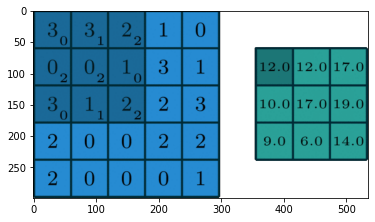

In [22]:
from PIL import Image
im = Image.open("anim.gif")
im.seek(0)
plt.imshow(im)

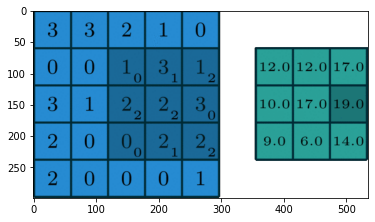

In [26]:
im.seek(5)
plt.imshow(im)

In [28]:
from scipy.signal import convolve2d

def convolve_image(img, kernel):
  img_conv = convolve2d(img, kernel)

  fig = plt.figure(figsize=(12,7))
  chart1 = fig.add_subplot(1, 2, 1)
  chart1.imshow(img, 'gray')

  chart2 = fig.add_subplot(1, 2, 2)
  chart2.imshow(img_conv, 'gray')

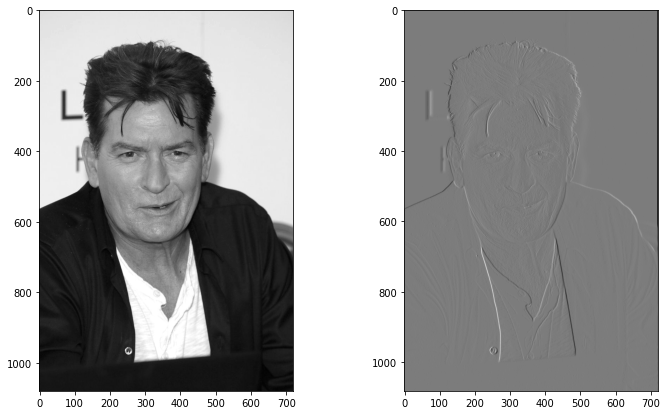

In [29]:
kernel = np.array([
  [1,0,-1],
  [2,0,-2],
  [1,0,-1]                   
])

convolve_image(img_gray, kernel)

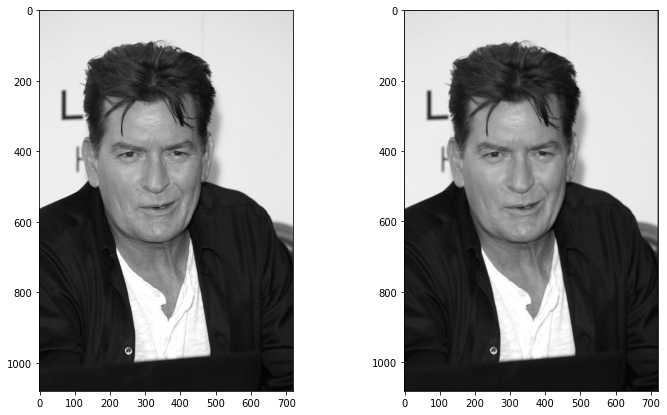

In [30]:
kernel = np.array([
  [0.01, 0.01, 0.01],
  [0.01, 0.01, 0.01],
  [0.01, 0.01, 0.01]                   
])

convolve_image(img_gray, kernel)

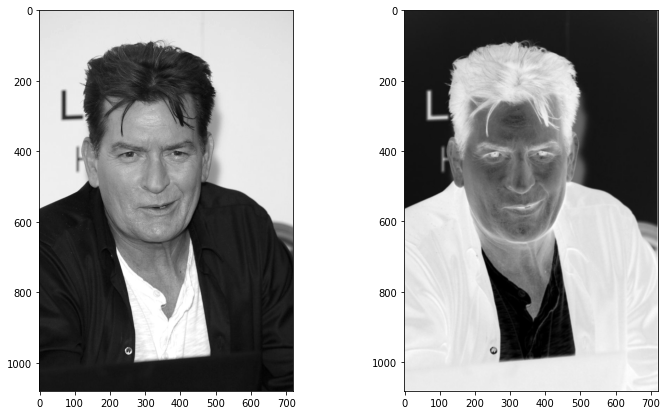

In [31]:
kernel = np.array([
  [-1, -1, -1],
  [-1, -1, -1],
  [-1, -1, -1],
])

convolve_image(img_gray, kernel)

In [33]:
# komponenty NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.random import set_seed

from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [34]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

11501568/11490434 [==============================] - 0s 0us/step


In [35]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [36]:
def plot_accuracy(result):
  plt.figure(figsize=(12,5))
  plt.plot(result.history["accuracy"], "r")
  plt.plot(result.history["val_accuracy"], "b")
  plt.legend(["accuracy","val_accuracy"])
  plt.show()